In [11]:
pip install ndlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

In [13]:
k_top10=pd.read_csv("score_Email.csv")
G= nx.read_edgelist("Email.txt", nodetype = int)

In [14]:
k_top10

,Unnamed: 0,Unnamed: 0.1,DC,BC,CC,EC,TOPSIS,k_means,k_means with score
0,0,0,104,104,104,104,104,104.0,140.0
1,1,1,332,332,332,332,332,53.0,592.0
2,2,2,22,22,22,41,22,181.0,642.0
3,3,3,41,41,41,195,41,321.0,592.0
4,4,4,40,75,75,15,75,239.0,440.0
5,5,5,577,40,40,48,40,742.0,889.0
6,6,6,232,577,232,115,577,501.0,592.0
7,7,7,195,232,134,203,232,718.0,592.0
8,8,8,15,134,377,2,195,55.0,165.0
9,9,9,377,354,51,55,134,1010.0,322.0


In [15]:

def si_model(measure):
    top=set(k_top10[measure].values.tolist())
    model = ep.SIModel(G)
    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta',0.3)
    cfg.add_model_initial_configuration("Infected", top)
    model.set_initial_status(cfg)
    iterations = model.iteration_bunch(10)
    S=[]
    I=[]
    it=[]
    for t in iterations:
        S.append(t['node_count'][0])
        I.append(t['node_count'][1])
        it.append(t['iteration'])
        if t['node_count'][1]==4039:
            break
    row=[it,I,S]
    return(row)


In [17]:
DC=[]
CC=[]
BC=[]
EC=[]
TOPSIS=[]
KMEANS=[]
KMEANS2=[]
#for i in r

CC.append(si_model('CC'))
BC.append(si_model('BC'))
EC.append(si_model('EC'))
TOPSIS.append(si_model('TOPSIS'))
KMEANS.append(si_model('k_means'))
KMEANS2.append(si_model('k_means with score'))

In [18]:
def Std_mean(lis):
    dc={}
    for i in range(1):
        for j in range(len(lis[i][0])):
            dc[lis[i][0][j]]=[]

    for i in range(1):
        for j in range(len(lis[i][0])):
            dc[lis[i][0][j]].append(lis[i][1][j])
    return dc


In [19]:
stdsCC=[]
meansCC=[]
d=Std_mean(CC)
for i in d:
    stdsCC.append(np.std(d[i]))
    meansCC.append(np.mean(d[i]))


In [20]:

stdsEC=[]
meansEC=[]
d=Std_mean(EC)
for i in d:
    stdsEC.append(np.std(d[i]))
    meansEC.append(np.mean(d[i]))

stdsBC=[]
meansBC=[]
d=Std_mean(BC)
for i in d:
    stdsBC.append(np.std(d[i]))
    meansBC.append(np.mean(d[i]))

stdsTOPSIS=[]
meansTOPSIS=[]
d=Std_mean(TOPSIS)
for i in d:
    stdsTOPSIS.append(np.std(d[i]))
    meansTOPSIS.append(np.mean(d[i]))


cc=Std_mean(CC)
ec=Std_mean(EC)
bc=Std_mean(BC)
topsis=Std_mean(TOPSIS)




In [21]:
stdsKMEANS=[]
meansKMEANS=[]
d=Std_mean(KMEANS)
for i in d:
    stdsKMEANS.append(np.std(d[i]))
    meansKMEANS.append(np.mean(d[i]))
    
    

In [22]:
stdsKMEANS2=[]
meansKMEANS2=[]
d=Std_mean(KMEANS2)
for i in d:
    stdsKMEANS2.append(np.std(d[i]))
    meansKMEANS2.append(np.mean(d[i]))

In [23]:

cc=Std_mean(CC)
ec=Std_mean(EC)
bc=Std_mean(BC)
topsis=Std_mean(TOPSIS)
kmeans=Std_mean(KMEANS)
kmeans2=Std_mean(KMEANS2)


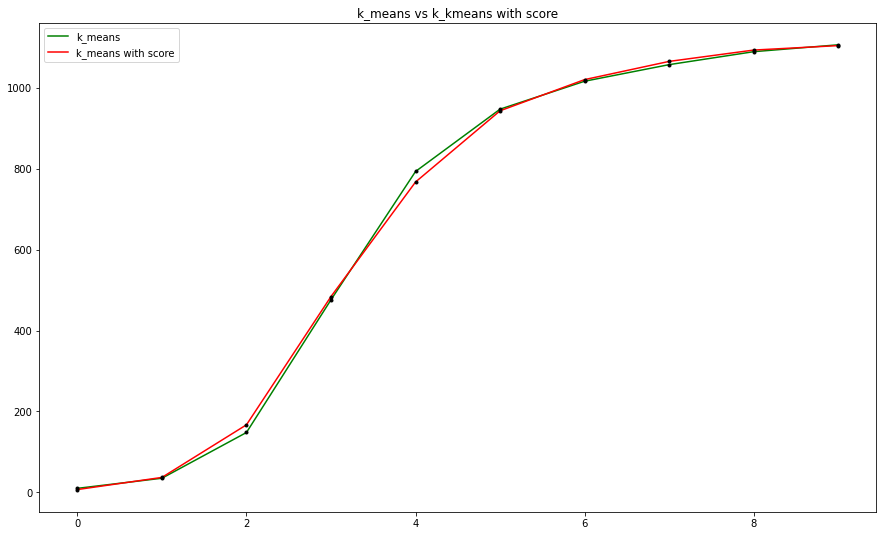

In [24]:
fig = plt.subplots(figsize=(15, 9))

plt.plot(sorted(kmeans.keys()) , meansKMEANS, label='k_means',c='green')
plt.errorbar(sorted(kmeans.keys()) , meansKMEANS, yerr=stdsKMEANS, fmt ='.k')
plt.plot(sorted(kmeans2.keys()) , meansKMEANS2, label='k_means with score',c='red')
plt.errorbar(sorted(kmeans2.keys()) , meansKMEANS2, yerr=stdsKMEANS, fmt ='.k')
plt.title('k_means vs k_kmeans with score')

plt.legend()

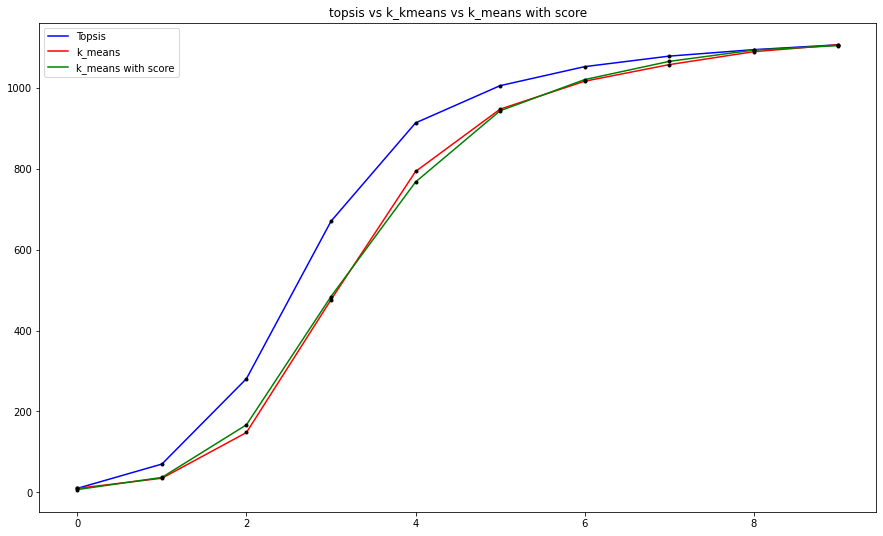

In [25]:
fig = plt.subplots(figsize=(15, 9))

plt.plot(sorted(topsis.keys()), meansTOPSIS, label='Topsis',c='blue')
plt.errorbar(topsis.keys(), meansTOPSIS, yerr=stdsTOPSIS, fmt ='.k')
plt.plot(sorted(kmeans.keys()) , meansKMEANS, label='k_means',c='red')
plt.errorbar(sorted(kmeans.keys()) , meansKMEANS, yerr=stdsKMEANS, fmt ='.k')
plt.plot(sorted(kmeans2.keys()) , meansKMEANS2, label='k_means with score',c='green')
plt.errorbar(sorted(kmeans2.keys()) , meansKMEANS2, yerr=stdsKMEANS2, fmt ='.k')
plt.title('topsis vs k_kmeans vs k_means with score')

plt.legend()